In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#open file
df = pd.read_csv('tanglaw_data_2.csv')

In [3]:
#view dataframe
df.head(5)

,Index,B1,B2,B3,B4,B5,B6,B7,Chl-a
0,0,561.0,621.0,725.0,634,93.0,429.0,278.0,9.73
1,1,550.0,625.0,NaN,649,91.0,443.0,296.0,9.46
2,2,NaN,NaN,763.0,658,94.0,461.0,NaN,NaN
3,3,557.0,650.0,766.0,676,NaN,NaN,325.0,10.73
4,4,748.0,752.0,815.0,674,89.0,95.0,121.0,13.38


In [4]:
#check for columns
df.columns

Index(['Index', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'Chl-a'], dtype='object')

In [5]:
#separate X and y
X,y = df[['B1', 'B2', 'B3', 
          'B4', 'B5', 'B6', 'B7']], df['Chl-a']

In [6]:
X.head(5)

,B1,B2,B3,B4,B5,B6,B7
0,561.0,621.0,725.0,634,93.0,429.0,278.0
1,550.0,625.0,NaN,649,91.0,443.0,296.0
2,NaN,NaN,763.0,658,94.0,461.0,NaN
3,557.0,650.0,766.0,676,NaN,NaN,325.0
4,748.0,752.0,815.0,674,89.0,95.0,121.0


In [7]:
y.head(5)

0     9.73
1     9.46
2      NaN
3    10.73
4    13.38
Name: Chl-a, dtype: float64

In [8]:
#split data into train and test set
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size = 0.2)

In [9]:
X_train

,B1,B2,B3,B4,B5,B6,B7
1742,1246.0,1485.0,1669.0,1516,400.0,470.0,513.0
81,827.0,1012.0,1261.0,935,254.0,483.0,400.0
778,1114.0,1317.0,1537.0,1402,289.0,276.0,350.0
1520,1216.0,1448.0,1696.0,1551,377.0,333.0,402.0
1903,1237.0,1513.0,1721.0,1621,525.0,359.0,413.0
...,...,...,...,...,...,...,...
2106,1296.0,1563.0,1832.0,1725,519.0,369.0,429.0
1930,1287.0,1517.0,1699.0,1535,418.0,514.0,558.0
376,1006.0,1188.0,1391.0,1189,121.0,184.0,278.0
27,772.0,849.0,1171.0,777,62.0,24.0,29.0


In [10]:
X_test

,B1,B2,B3,B4,B5,B6,B7
1293,1173.0,1412.0,1652.0,1451,263.0,369.0,430.0
882,1114.0,1350.0,1580.0,1384,157.0,279.0,358.0
1712,1235.0,1480.0,1721.0,1532,466.0,402.0,459.0
851,1119.0,1342.0,1562.0,1358,168.0,292.0,367.0
1047,1123.0,1382.0,1642.0,1346,461.0,688.0,572.0
...,...,...,...,...,...,...,...
1657,1210.0,1470.0,1711.0,1572,355.0,304.0,378.0
441,1011.0,1202.0,1409.0,1200,125.0,217.0,303.0
1444,1194.0,1437.0,1663.0,1457,255.0,356.0,425.0
741,1096.0,1304.0,1533.0,1324,138.0,295.0,366.0


In [11]:
y_train

1742     8.10
81       7.45
778     16.93
1520    18.08
1903    15.47
        ...  
2106    16.26
1930    11.56
376     17.62
27       5.05
230      8.12
Name: Chl-a, Length: 1794, dtype: float64

In [12]:
y_test

1293    17.40
882      7.25
1712    10.90
851     12.75
1047     7.10
        ...  
1657    18.52
441     18.72
1444    18.19
741      8.43
1664    15.51
Name: Chl-a, Length: 449, dtype: float64

In [13]:
#get the descriptive summary 
y_train.describe()

count    1791.000000
mean       12.318280
std         4.737772
min       -30.000000
25%         7.710000
50%        12.810000
75%        16.890000
max        18.990000
Name: Chl-a, dtype: float64

Text(0, 0.5, 'Density')

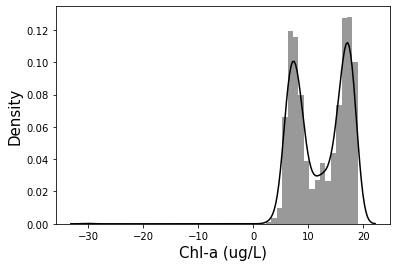

In [14]:
sns.distplot(y_train, 
             bins = 50,
            color = 'k')
plt.xlabel('Chl-a (ug/L)', 
          fontsize = 15)
plt.ylabel('Density', 
          fontsize = 15)

Deviate from the normal distribution.
Show peakedness.
Is bimodal

Bimodal means there are peaks of data, which indicates two different groups.
For Chl-a in Laguna lake, two range of values were observed. First group with lower Chl-a values corresponds to different intensity of aquaculture activities. If this shape occurs, the two sources should be separated and analyzed separately.

In [15]:
# distribution characteristics can be computed using skewness and kurtosis
#skewness and kurtosis
print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

Skewness: -0.464835
Kurtosis: 1.826582


If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
-Data sets with positive kurtosis tend to have heavy tails, or outliers. 
-Data sets with low kurtosis tend to have light tails, or have few outliers

Important: Skewness and Kurtosis are highly dependent on sample size. Hence, it is important to consider the distribution of every fold when doing k-fold cross validation especially for datasets <10,000 observations

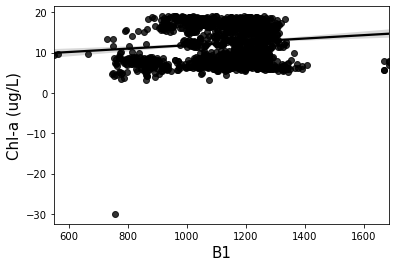

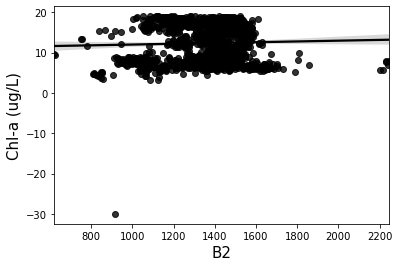

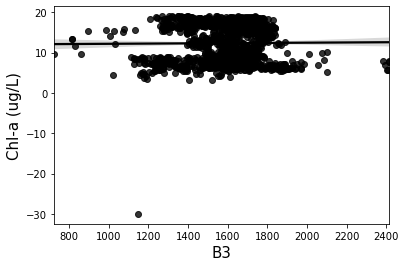

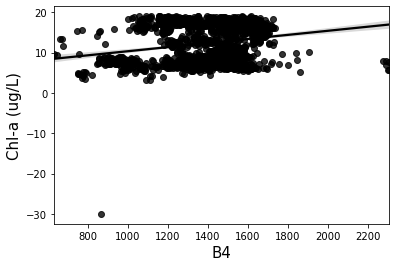

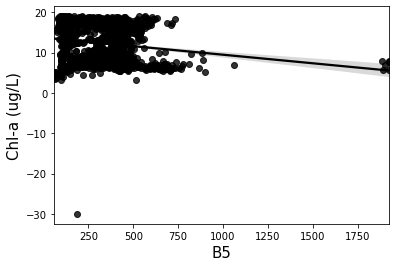

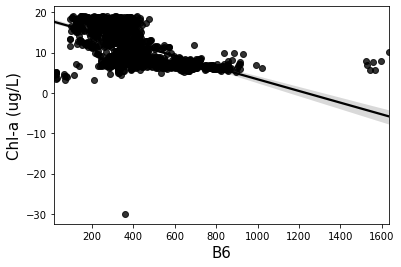

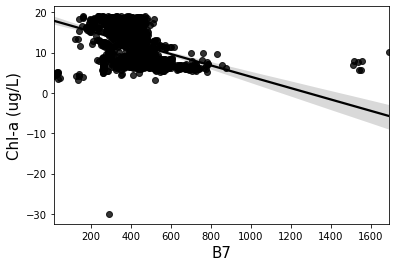

In [16]:
#relationship with other features/ variables
for cols in X_train.columns:
    sns.regplot(x = X_train[cols], 
                y = y_train,
               color = 'k')
    plt.xlabel(cols, 
          fontsize = 15)
    plt.ylabel('Chl-a (ug/L)', 
          fontsize = 15)
    plt.show()

Compute for the correlation matrix to visualize correlations

In [17]:
#first, X and y should be merged into 1 data frame
df_merge_train = pd.concat([X_train, y_train], axis = 1) # 0: index , 1: columns

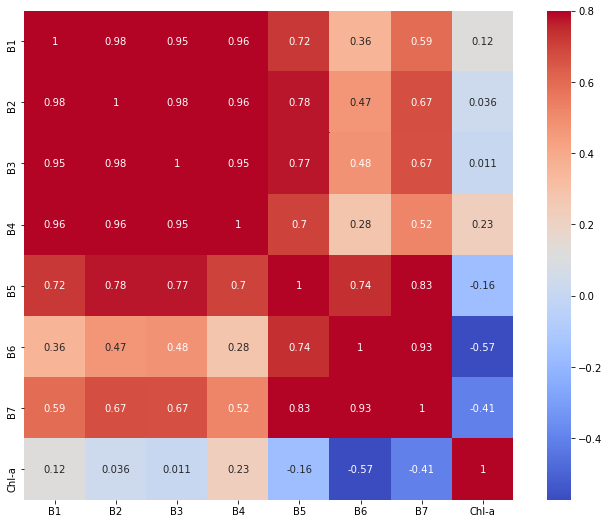

In [18]:
#compute the correlation matrix
corr_matrix = df_merge_train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corr_matrix, 
            vmax = .8, 
            square = True,
           cmap = 'coolwarm',
           annot = True);

In [19]:
#first, X and y should be merged into 1 data frame
df_merge_train = pd.concat([X_train, y_train], axis = 1) # 0: index , 1: columns

Multicollinearity can be seen from B1-B4. They give the same information and thus do not provide any new information. B6 has the strongest correlation (negative) to Chl-a while B5 has the weakest 

--

Missing data

Rows with missing data can be removed but this reduces the sample size. Sometimes, missing data can be better removed and sometimes not. This is a case to case basis

In [20]:
#missing data
total = df_merge_train.isnull().sum().sort_values(ascending = False)
percent = (df_merge_train.isnull().sum() / df_merge_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Chl-a,3,0.001672
B1,3,0.001672
B5,2,0.001115
B3,2,0.001115
B2,2,0.001115
B7,1,0.000557
B6,1,0.000557
B4,0,0.000000


In [21]:
imp_mean = SimpleImputer(missing_values = np.nan, 
                         strategy = 'mean')
imputed = imp_mean.fit_transform(df_merge_train)

In [22]:
#convert to dataframe
df_imputed_train = pd.DataFrame(imputed,
                               columns = df_merge_train.columns)

In [23]:
df_imputed_train

,B1,B2,B3,B4,B5,B6,B7,Chl-a
0,1246.0,1485.0,1669.0,1516.0,400.0,470.0,513.0,8.10
1,827.0,1012.0,1261.0,935.0,254.0,483.0,400.0,7.45
2,1114.0,1317.0,1537.0,1402.0,289.0,276.0,350.0,16.93
3,1216.0,1448.0,1696.0,1551.0,377.0,333.0,402.0,18.08
4,1237.0,1513.0,1721.0,1621.0,525.0,359.0,413.0,15.47
...,...,...,...,...,...,...,...,...
1789,1296.0,1563.0,1832.0,1725.0,519.0,369.0,429.0,16.26
1790,1287.0,1517.0,1699.0,1535.0,418.0,514.0,558.0,11.56
1791,1006.0,1188.0,1391.0,1189.0,121.0,184.0,278.0,17.62
1792,772.0,849.0,1171.0,777.0,62.0,24.0,29.0,5.05


In [24]:
#check if there are no more missing data
df_imputed_train.isnull().sum()

B1       0
B2       0
B3       0
B4       0
B5       0
B6       0
B7       0
Chl-a    0
dtype: int64

--

Outlier detection

Outlier detection involves establishing a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

Outliers affect our models and can be a valuable source of information, providing us insights about specific behaviours.

<AxesSubplot:xlabel='Chl-a'>

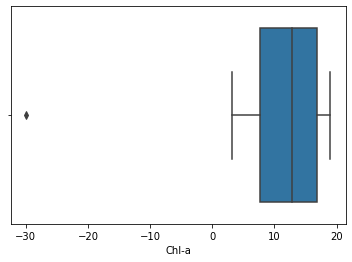

In [25]:
sns.boxplot(df_imputed_train['Chl-a'])

In [33]:
#we remove outliers that is +/- 2std
y_ave_train = df_imputed_train['Chl-a'].mean()
y_std_train = df_imputed_train['Chl-a'].std()

In [34]:
y_train_clean = [x for x in df_imputed_train['Chl-a'] if (x > y_ave_train - 2 * y_std_train)]
y_train_clean = [x for x in y_train_clean if (x < y_ave_train + 2 * y_std_train)]

<AxesSubplot:>

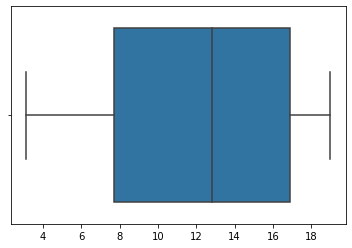

In [35]:
sns.boxplot(y_train_clean)

According to Hair et al. (2013), four assumptions should be tested:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). Heteroscedacity can be avoided if data is normal

Homoscedasticity - Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations.

Absence of correlated errors - happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related.

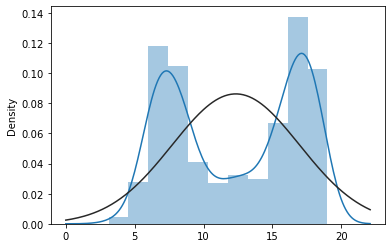

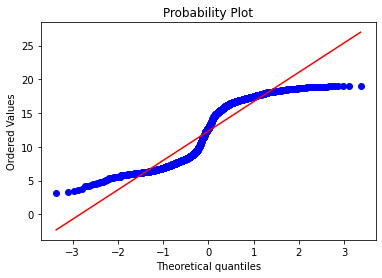

In [36]:
#histogram and normal probability plot
sns.distplot(y_train_clean, fit = norm);
fig = plt.figure()
res = stats.probplot(y_train_clean, plot = plt)

Guidelines on how to fix skewness from:
https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

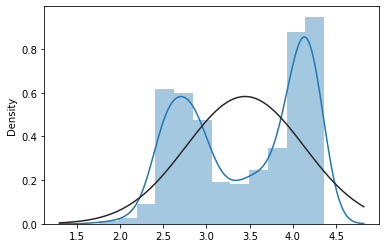

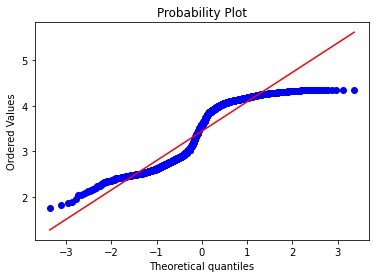

In [51]:
#For positive skewness
#sqrt transformation
transformed = np.sqrt(y_train_clean)
sns.distplot(transformed, fit = norm);
fig = plt.figure()
res = stats.probplot(transformed, plot = plt)

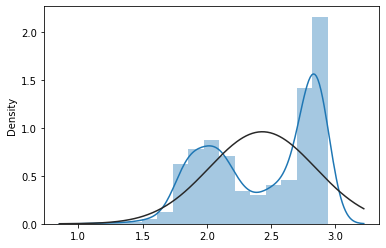

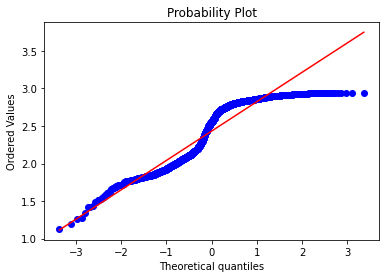

In [52]:
#For positive skewness
#log transformation
transformed = np.log(y_train_clean)
sns.distplot(transformed, fit = norm);
fig = plt.figure()
res = stats.probplot(transformed, plot = plt)

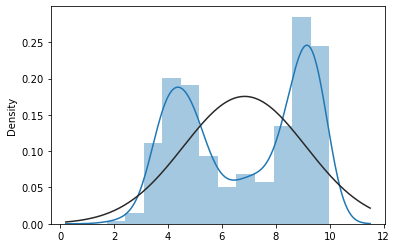

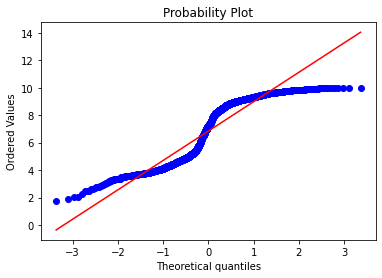

In [58]:
#For positive skewness
# Box-Cox Transformation 
transformed = boxcox(y_train_clean)[0]
sns.distplot(transformed, fit = norm);
fig = plt.figure()
res = stats.probplot(transformed, plot = plt)

-------

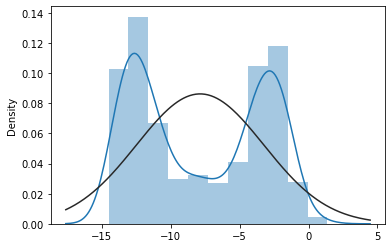

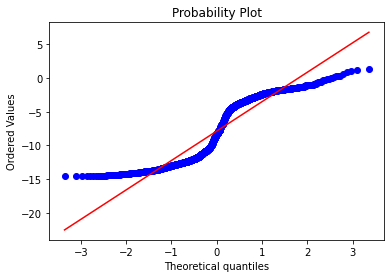

In [60]:
#For negative skewness
#sqrt transformation
transformed = (np.sqrt(max(np.add(y_train_clean, 1))) - y_train_clean)
sns.distplot(transformed, fit = norm);
fig = plt.figure()
res = stats.probplot(transformed, plot = plt)

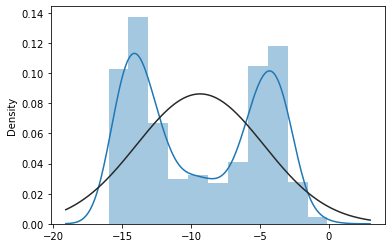

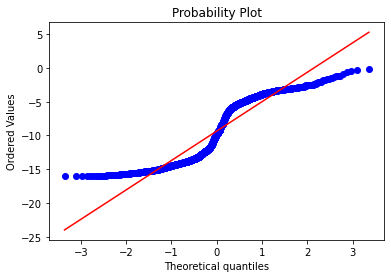

In [62]:
#For negative skewness
#log transformation
transformed = (np.log(max(np.add(y_train_clean, 1))) - y_train_clean)
sns.distplot(transformed, fit = norm);
fig = plt.figure()
res = stats.probplot(transformed, plot = plt)